In [25]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter

%matplotlib inline


conflict_df = pd.read_csv("Resources\Wars.csv")
commoditiy_df = pd.read_csv("Resources\commdataclean.csv")
war_data = pd.read_csv("Resources\warlist.csv")
war_data = war_data.rename(columns={"Years": "Start Year"})
# Extract end year and update "Years" column (efficient)
war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# Optional: Remove leading "- " (if present)
war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')
war_data

,War,Start Year,End Year,Start Date,End Date
0,Russo-Ukrainian War,2014,2024,2014-01-01,2024-01-01
1,Sectarian Conflict in the Central African Repu...,2012,2022,2012-01-01,2022-01-01
2,Syrian civil war,2011,2022,2011-01-01,2022-01-01
3,Somalia Civil War,2006,2022,2006-01-01,2022-01-01
4,South Sudanese Civil War,2011,2017,2011-01-01,2017-01-01
...,...,...,...,...,...
143,Bolivian Revolution,1952,1952,1952-01-01,1952-01-01
144,Indian Govt vs Communist Rebels CPI,1948,1951,1948-01-01,1951-01-01
145,Soviet Union vs Baltic Partisans (’’Forest Bre...,1945,1951,1945-01-01,1951-01-01
146,Third Sino-Tibetan War,1950,1950,1950-01-01,1950-01-01


In [26]:
community_df = commoditiy_df.iloc[1:]
commoditiy_df.drop(0, inplace=True)

In [27]:


# Method 1: Using a list of columns to keep
keep_cols = ['Date','Wheat, US HRW', 'Gold', 'Rice, Thai 5% ',"Tea, avg 3 auctions","Coffee, Arabica"]
df_filtered = commoditiy_df[keep_cols]  # Select only the columns you want to keep


df_filtered


,Date,"Wheat, US HRW",Gold,"Rice, Thai 5%","Tea, avg 3 auctions","Coffee, Arabica"
1,1960-01-01,59.89,35.27,104.45,1.03,0.94
2,1960-02-01,60.99,35.27,103.54,1.03,0.95
3,1960-03-01,61.73,35.27,103.79,1.03,0.93
4,1960-04-01,60.99,35.27,100.97,1.03,0.93
5,1960-05-01,57.69,35.27,102.15,1.03,0.92
...,...,...,...,...,...,...
767,2023-11-01,283.55,1984.11,598.00,2.74,4.35
768,2023-12-01,291.12,2026.18,644.00,2.71,4.65
769,2024-01-01,283.91,2034.04,660.00,2.66,4.47
770,2024-02-01,278.50,2023.24,624.00,2.71,4.60


C:\Users\austi\AppData\Local\Temp\ipykernel_41792\269209852.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
C:\Users\austi\AppData\Local\Temp\ipykernel_41792\269209852.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
C:\Users\austi\AppData\Local\Temp\ipykernel_41792\269209852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

(0.0, 2000.0)

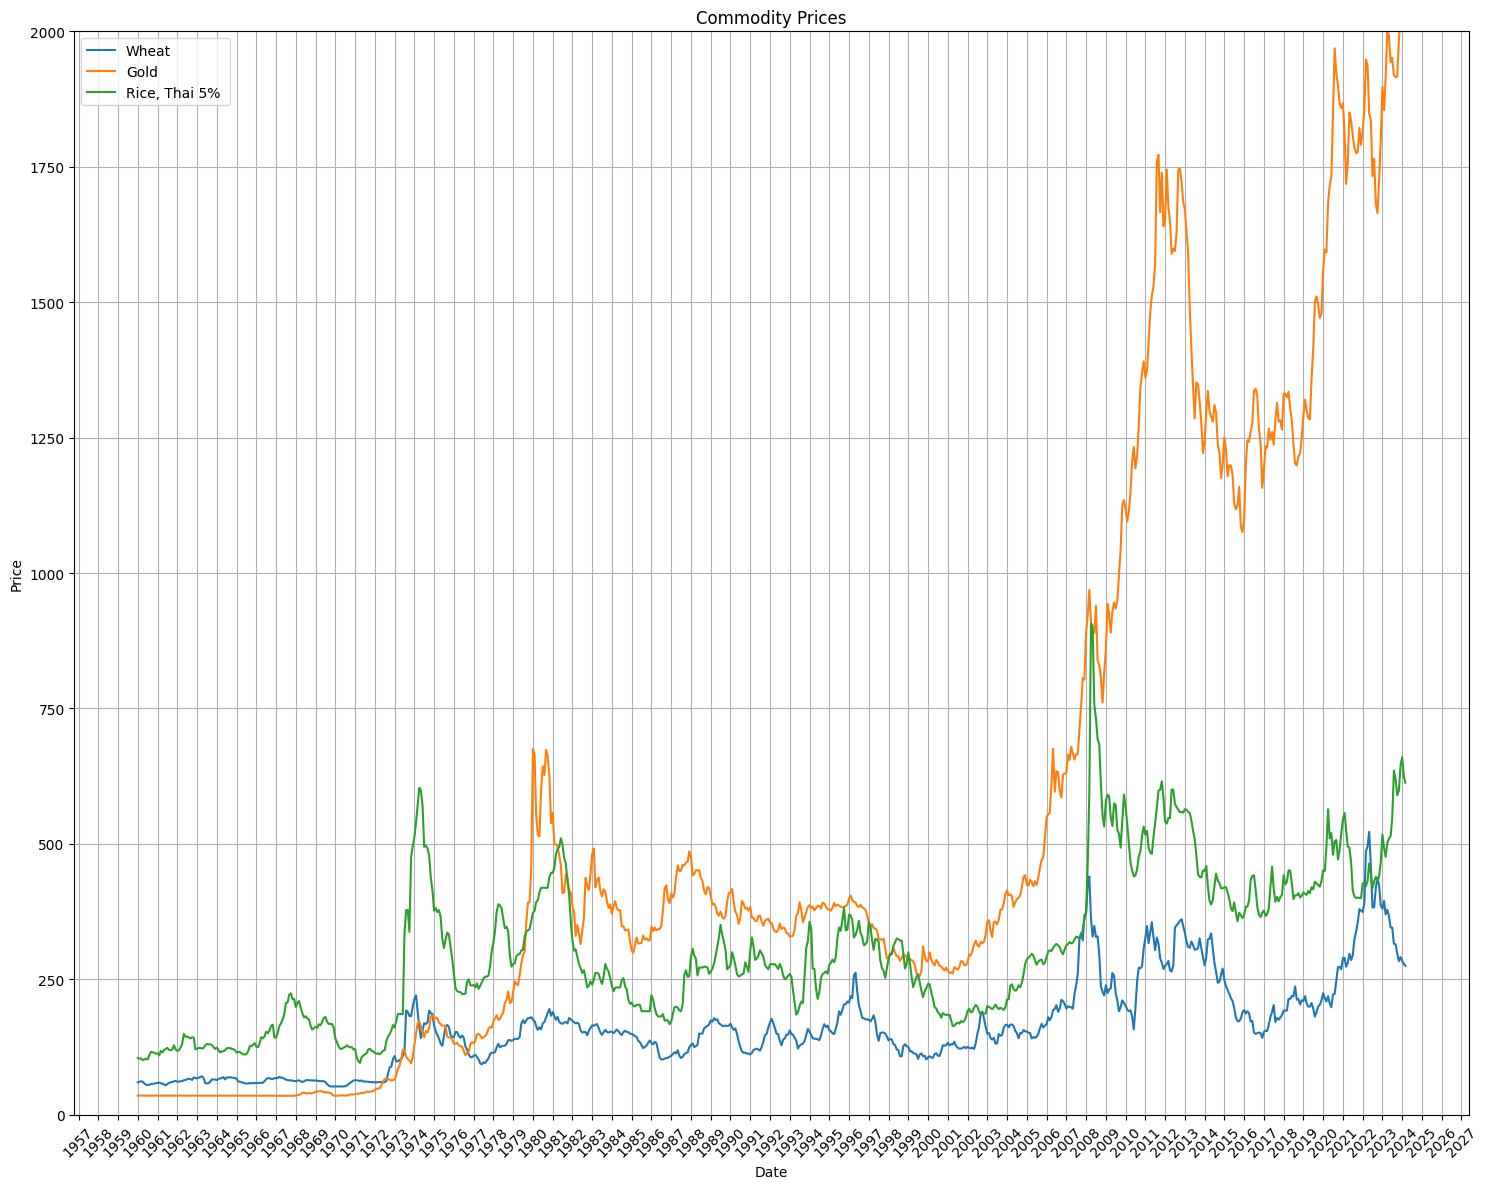

In [28]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation




df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
df_filtered['Gold'] = df_filtered['Gold'].apply(float)
df_filtered['Rice, Thai 5% '] = df_filtered['Rice, Thai 5% '].apply(float)

# Increase figure size
plt.figure(figsize=(15, 12))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (2000)

# Ensure Start Date and End Date are datetime format (if necessary)
#if not pd.api.types.is_datetime64_dtype(war_data["Start Date"]):
#    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#        war_data["Start Date"] = pd.to_datetime(war_data["Start Date"], format='%Y-%m-%d')  # Adjust format if needed
#    except ValueError:
#        print("Error: Inconsistent date format in 'Start Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting

#if not pd.api.types.is_datetime64_dtype(war_data["End Date"]):
#    try:
        # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#        war_data["End Date"] = pd.to_datetime(war_data["End Date"], format='%Y-%m-%d')  # Adjust format if needed
#    except ValueError:
#        print("Error: Inconsistent date format in 'End Date'. Please check and adjust the format string in pd.to_datetime().")
        # Handle the case where conversion fails due to inconsistent formatting



C:\Users\austi\AppData\Local\Temp\ipykernel_41792\3971085597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Tea, avg 3 auctions"] = df_filtered["Tea, avg 3 auctions"].apply(float)
C:\Users\austi\AppData\Local\Temp\ipykernel_41792\3971085597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Coffee, Arabica"] = df_filtered["Coffee, Arabica"].apply(float)


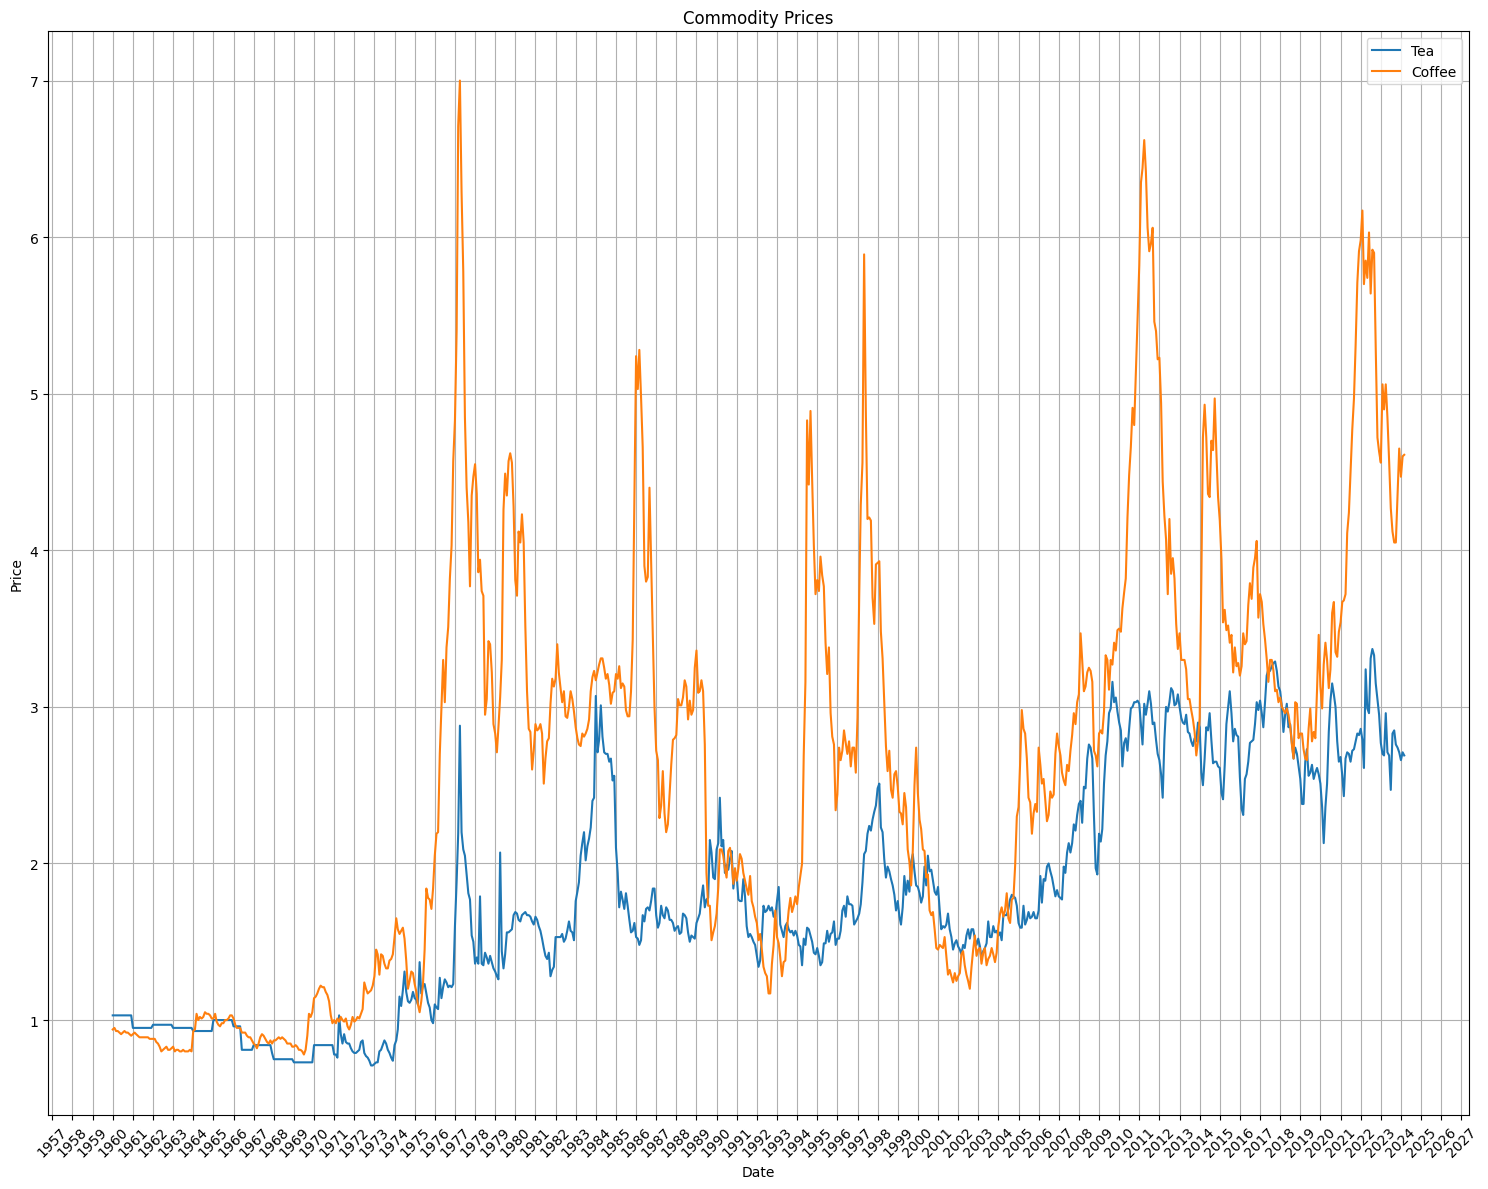

In [30]:
df_filtered["Tea, avg 3 auctions"] = df_filtered["Tea, avg 3 auctions"].apply(float)
df_filtered["Coffee, Arabica"] = df_filtered["Coffee, Arabica"].apply(float)
# Increase figure size
plt.figure(figsize=(15, 12))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered["Tea, avg 3 auctions"], label='Tea', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered["Coffee, Arabica"], label="Coffee", linestyle='-')  # Store lines for later use


plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements




In [74]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
df_filtered['Gold'] = df_filtered['Gold'].apply(float)
df_filtered['Rice, Thai 5% '] = df_filtered['Rice, Thai 5% '].apply(float)
df_filtered['Tea, avg 3 auctions'] = df_filtered['Tea, avg 3 auctions'].apply(float)
df_filtered['Coffee, Arabica'] = df_filtered['Coffee, Arabica'].apply(float)
pchangedf = df_filtered[['Wheat, US HRW', 'Gold', 'Rice, Thai 5% ',"Tea, avg 3 auctions","Coffee, Arabica"]]
pchdf = pchangedf.pct_change()


C:\Users\austi\AppData\Local\Temp\ipykernel_41792\2617452114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
C:\Users\austi\AppData\Local\Temp\ipykernel_41792\2617452114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
C:\Users\austi\AppData\Local\Temp\ipykernel_41792\2617452114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

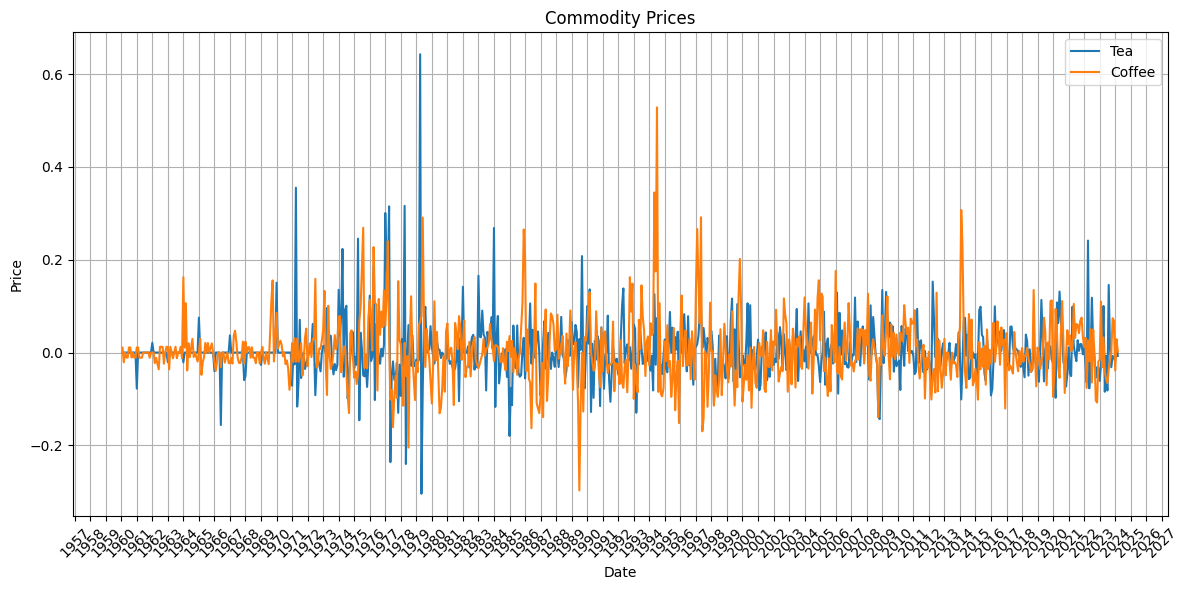

In [76]:

###['Date','Wheat, US HRW', 'Gold', 'Rice, Thai 5% ',"Tea, avg 3 auctions","Coffee, Arabica"]



#df_filtered["Coffee, Arabica"] = df_filtered["Coffee, Arabica"].apply(float)
# Increase figure size
plt.figure(figsize=(12, 6))

# Plot with labels and title (adjust y-axis range to 2000)
#lines1 = plt.plot(df_filtered['Date'], pchdf['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
#lines1 = plt.plot(df_filtered['Date'], pchdf['Gold'], label='Gold', linestyle='-') 
lines1 = plt.plot(df_filtered['Date'], pchdf['Tea, avg 3 auctions'], label='Tea', linestyle='-') 
#lines1 = plt.plot(df_filtered['Date'], pchdf['Rice, Thai 5% '], label='Rice', linestyle='-') 
lines1 = plt.plot(df_filtered['Date'], pchdf['Coffee, Arabica'], label='Coffee', linestyle='-') 


plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import pearsonr

In [113]:


# Read the data from the CSV file
data = pd.read_csv("Resources\clean_war_data.csv")

# Select rows where column 1 values are in the list
filtered_data = data[data.iloc[:, 0].isin([99, 15, 11, 106, 70, 56, 45, 12, 0])]

# Save the filtered data to a new CSV file (optional)
filtered_data.to_csv("filtered_war_data.csv", index=False)

print("Filtering complete! Check 'filtered_war_data.csv' for the results.")


Filtering complete! Check 'filtered_war_data.csv' for the results.


In [118]:
commodity_prices = df_filtered.set_index('Date')
commodity_prices.to_csv('commodity_prices_date_index.csv')





In [98]:

# new_names = {'Wheat, US HRW': 'Wheat', 'Rice, Thai 5% ': 'Rice', 'Tea, avg 3 auctions': 'Tea', 'Coffee, Arabica':'Coffee'}
# commodity_prices = df_filtered.set_index('Date')
# commodity_prices = commodity_prices.rename(columns=new_names)

# commodity_prices.to_csv('commodity_prices_clean.csv')

In [120]:
# Load commodity price data (assuming 'date' is the time index and 'price' is the price column)
commodity_data = pd.read_csv("Resources\commodity_prices_clean.csv", index_col="Date", parse_dates=True)

# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data = pd.read_csv("filtered_war_data.csv")
commodity_data.index = commodity_data.index.strftime('%Y-%m-%d')
# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data):
  for _, row in conflict_data.iterrows():
    if (date >= row["Start Date"]) & (date <= row["End Date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data["conflict"] = commodity_data.index.map(lambda x: create_conflict_indicator(x, conflict_data))


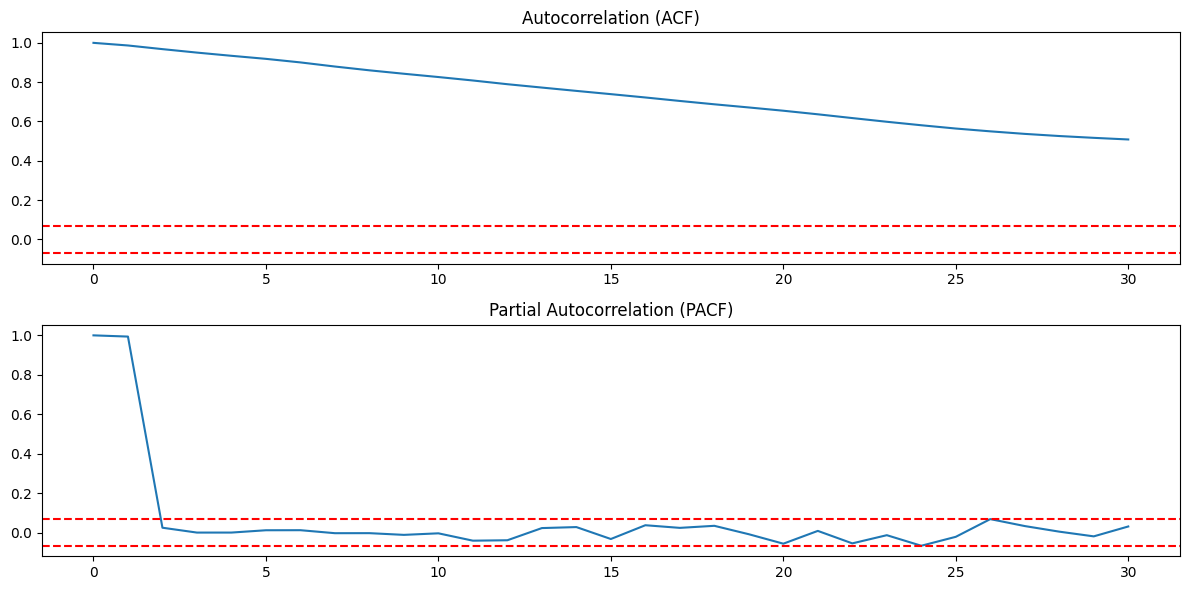

In [121]:
# Calculate Autocorrelation (ACF) and Partial Autocorrelation (PACF)
acf_values = acf(commodity_data["Gold"], nlags=30)  # Adjust nlags as needed
pacf_values = pacf(commodity_data["Gold"], nlags=30)  # Adjust nlags as needed
acf_values = acf(commodity_data["Wheat"], nlags=30)  # Adjust nlags as needed
pacf_values = pacf(commodity_data["Gold"], nlags=30)  # Adjust nlags as needed
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(acf_values)
plt.axhline(y=1.96/np.sqrt(len(commodity_data)), color='red', linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(commodity_data)), color='red', linestyle='--')
plt.title("Autocorrelation (ACF)")
plt.subplot(212)
plt.plot(pacf_values)
plt.axhline(y=1.96/np.sqrt(len(commodity_data)), color='red', linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(commodity_data)), color='red', linestyle='--')
plt.title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()


In [108]:
commodity_data

,Wheat,Gold,Rice,Tea,Coffee,conflict
Date,,,,,,
1960-01-01,59.89,35.27,104.45,1.03,0.94,1
1960-02-01,60.99,35.27,103.54,1.03,0.95,1
1960-03-01,61.73,35.27,103.79,1.03,0.93,1
1960-04-01,60.99,35.27,100.97,1.03,0.93,1
1960-05-01,57.69,35.27,102.15,1.03,0.92,1
...,...,...,...,...,...,...
2023-11-01,283.55,1984.11,598.00,2.74,4.35,1
2023-12-01,291.12,2026.18,644.00,2.71,4.65,1
2024-01-01,283.91,2034.04,660.00,2.66,4.47,1


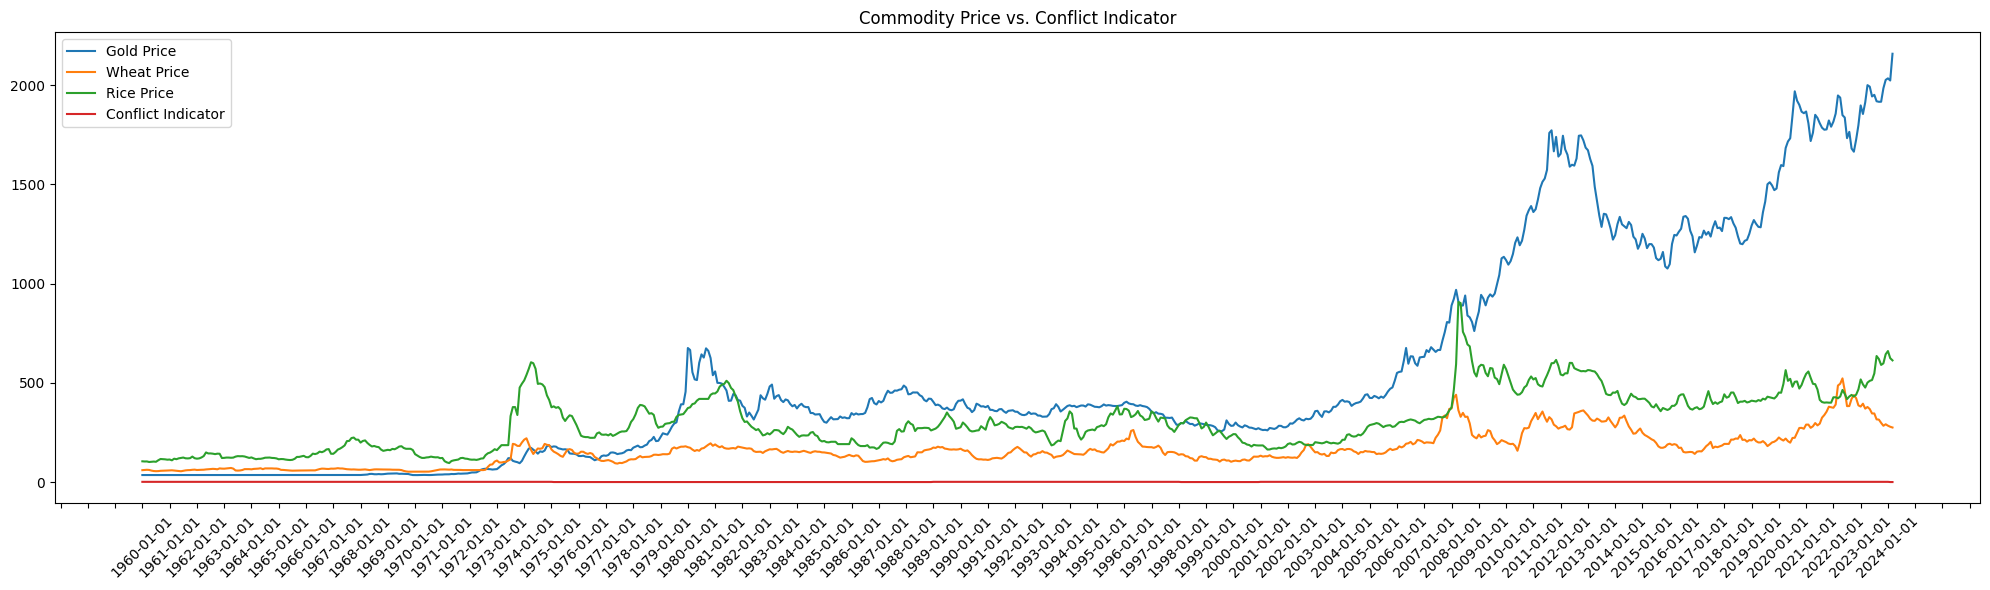

Gold Correlation Coefficient: 0.2309
Gold p-value: 0.0000
Wheat Correlation Coefficient: 0.1612
Wheat p-value: 0.0000
RiceCorrelation Coefficient: 0.0912
Rice p-value: 0.0113


In [130]:
import matplotlib.ticker as ticker  # Import the ticker module
# Plot commodity price and conflict indicator together

plt.figure(figsize=(20,6))
plt.plot(commodity_data["Gold"], label="Gold Price")
plt.plot(commodity_data["Wheat"], label="Wheat Price")
plt.plot(commodity_data["Rice"], label="Rice Price")
plt.plot(commodity_data["conflict"], label="Conflict Indicator")
plt.legend()
plt.title("Commodity Price vs. Conflict Indicator")
# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.tight_layout()  # Adjust spacing to prevent overlapping elements

plt.show()

# Calculate Pearson correlation coefficient of Gold
correlation_gold, p_value_gold = pearsonr(commodity_data["Gold"], commodity_data["conflict"])
print(f"Gold Correlation Coefficient: {correlation_gold:.4f}")
print(f"Gold p-value: {p_value_gold:.4f}")

# Calculate Pearson correlation coefficient of Wheat
correlation_wheat, p_value_wheat = pearsonr(commodity_data["Wheat"], commodity_data["conflict"])
print(f"Wheat Correlation Coefficient: {correlation_wheat:.4f}")
print(f"Wheat p-value: {p_value_wheat:.4f}")

# Calculate Pearson correlation coefficient of Rice
correlation_Rice, p_value_Rice = pearsonr(commodity_data["Rice"], commodity_data["conflict"])
print(f"RiceCorrelation Coefficient: {correlation_Rice:.4f}")
print(f"Rice p-value: {p_value_Rice:.4f}")


In [109]:
# Load commodity price data (assuming 'date' is the time index and 'price' is the price column)
commodity_data = war_data(war_data, index_col="Date", parse_dates=True)

# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
war_data

# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data):
  for _, row in conflict_data.iterrows():
    if (date >= row["start_date"]) & (date <= row["end_date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data["conflict"] = commodity_data.index.map(lambda x: create_conflict_indicator(x, conflict_data))


TypeError: 'DataFrame' object is not callable

AttributeError: 'Timestamp' object has no attribute 'dt'

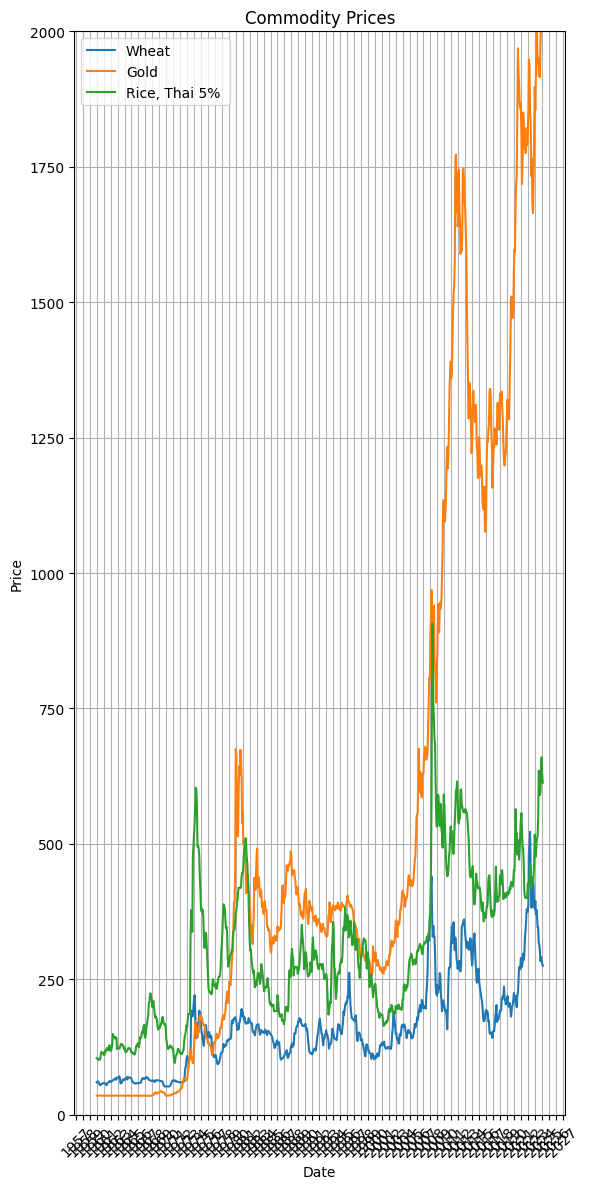

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import YearLocator, DateFormatter
# import numpy as np  # Needed for heatmap
# from datetime import datetime  # Assuming Start Date is datetime format
# import pandas as pd  # Needed for data manipulation

# # Increase figure size
# plt.figure(figsize=(6, 12))

# # Plot with labels and title (adjust y-axis range to 2000)
# lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
# lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
# lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

# plt.xlabel('Date')
# plt.ylabel('Price')  # Assuming the values represent price
# plt.title('Commodity Prices')
# plt.legend()

# # Set gridlines
# plt.grid(True)

# # Control x-axis ticks for yearly increments
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# # Show the plot with potentially adjusted rotation for labels
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

# plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# # Now set the y-axis limits after creating the lines
# plt.ylim(0, 2000)  # Set y-axis range to (2000)

# # Ensure Start Date and End Date are datetime format (if necessary)
# if not pd.api.types.is_datetime64_dtype(war_data["Start Date"]):
#     try:
#         # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#         war_data["Start Date"] = pd.to_datetime(war_data["Start Date"], format='%Y-%m-%d')  # Adjust format if needed
#     except ValueError:
#         print("Error: Inconsistent date format in 'Start Date'. Please check and adjust the format string in pd.to_datetime().")
#         # Handle the case where conversion fails due to inconsistent formatting

# if not pd.api.types.is_datetime64_dtype(war_data["End Date"]):
#     try:
#         # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#         war_data["End Date"] = pd.to_datetime(war_data["End Date"], format='%Y-%m-%d')  # Adjust format if needed
#     except ValueError:
#         print("Error: Inconsistent date format in 'End Date'. Please check and adjust the format string in pd.to_datetime().")
#         # Handle the case where conversion fails due to inconsistent formatting

# # Calculate year ranges for heatmap
# years = war_data["Start Date"].dt.year  # Extract years from Start Date (assuming conversion successful)

# # Create a binary array indicating conflict presence (1) or absence (0) for each year
# conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
# for index, row in war_data.iterrows():
#     start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
#     end_year = row["End Date"].dt.year.item()  # Extract year from datetime
#     for year in range(start_year, end_year + 1):
#         conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

# # Calculate conflict years
# conflict_years = []
# for index, row in war_data.iterrows():
#     start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
#     end_year = row["End Date"].dt.year.item()  # Extract year from datetime
#     for year in range(start_year, end_year + 1):
#         conflict_years.append(year)

# # Plot points for conflict years (consider marker and color customization)
# plt.scatter(conflict_years, np.zeros(len(conflict_years)), marker='o', color='red', s=50, label='Conflict Year')  # Adjust marker, color, and size

# # Heatmap plot (adjust extent for point visibility if needed)
# extent = (min(years), max(years), 0, 1.1)  # Adjust extent for year range and binary values
# cmap = plt.cm.binary  # Choose a colormap for conflict presence (e.g., black for conflict, white for no conflict)
# plt.imshow(conflict_presence.reshape(-1, 1), extent=extent, cmap=cmap, alpha=0.7)

# # Inverted x-axis for heatmap (optional)

# plt.colorbar(label="Conflict Presence (1 = Conflict)")  # Add colorbar with label
# # plt.gca().invert_xaxis()
# plt.show()

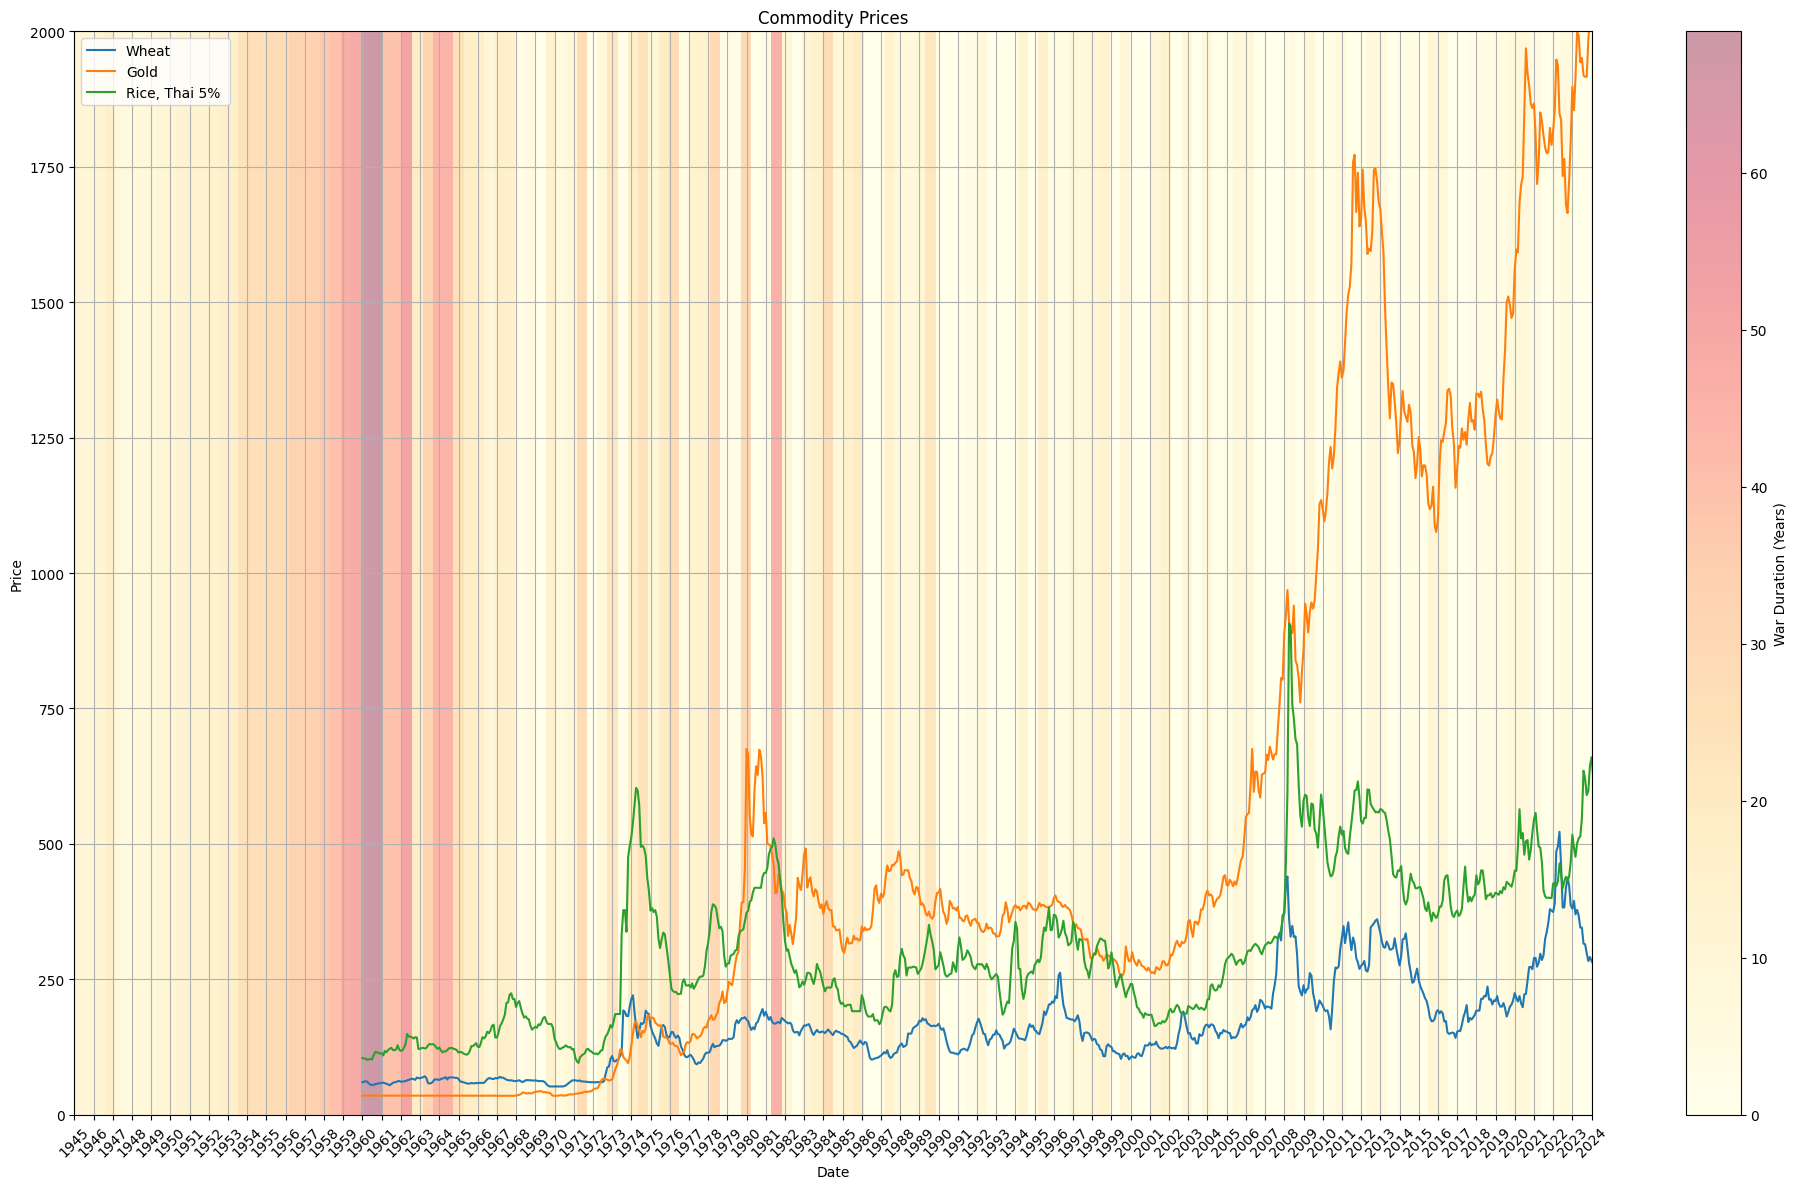

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import YearLocator, DateFormatter
# import numpy as np  # Needed for heatmap
# from datetime import datetime  # Assuming Start Date is datetime format

# # Increase figure size
# plt.figure(figsize=(20, 12))  # Swap width and height for vertical orientation

# # Plot with labels and title
# lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
# lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
# lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

# plt.xlabel('Date')
# plt.ylabel('Price')  # Assuming the values represent price
# plt.title('Commodity Prices')
# plt.legend()

# # Set gridlines
# plt.grid(True)

# # Control x-axis ticks for yearly increments
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# # Show the plot with potentially adjusted rotation for labels
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

# plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# # Now set the y-axis limits after creating the lines
# plt.ylim(0, 2000)  # Set y-axis range to (0, 2000)

# # Calculate year ranges for heatmap (assuming Start Date and End Date represent years)
# years = war_data["Start Date"].dt.year  # Extract years from Start Date
# durations = (war_data["End Date"].dt.year - years)  # Calculate durations (End Year - Start Year)

# # Create a colormap for the heatmap
# cmap = plt.cm.YlOrRd  # Choose a colormap (e.g., YlOrRd represents yellow to red)

# # Create a 2D array for the heatmap data (transpose for vertical orientation)
# heatmap_data = np.zeros((len(durations), 1))  # One column for durations
# heatmap_data[:, 0] = durations.values  # Assign durations to the heatmap data
# heatmap_data = heatmap_data.T  # Transpose the data for vertical heatmap

# # Plot the heatmap (using y-axis for durations)
# extent = (min(date2num(war_data["Start Date"])), max(date2num(war_data["End Date"])), 0, max(durations) + 2000)  # Adjust extent as needed
# plt.imshow(heatmap_data, extent=extent, cmap=cmap, alpha=0.4, aspect='auto')

# # Inverted x-axis for heatmap (optional)
# # plt.gca().invert_xaxis()  # Invert x-axis to align with price x-axis (optional)

# plt.colorbar(label="War Duration (Years)")  # Add colorbar with label

# plt.show()

AttributeError: 'Timestamp' object has no attribute 'dt'

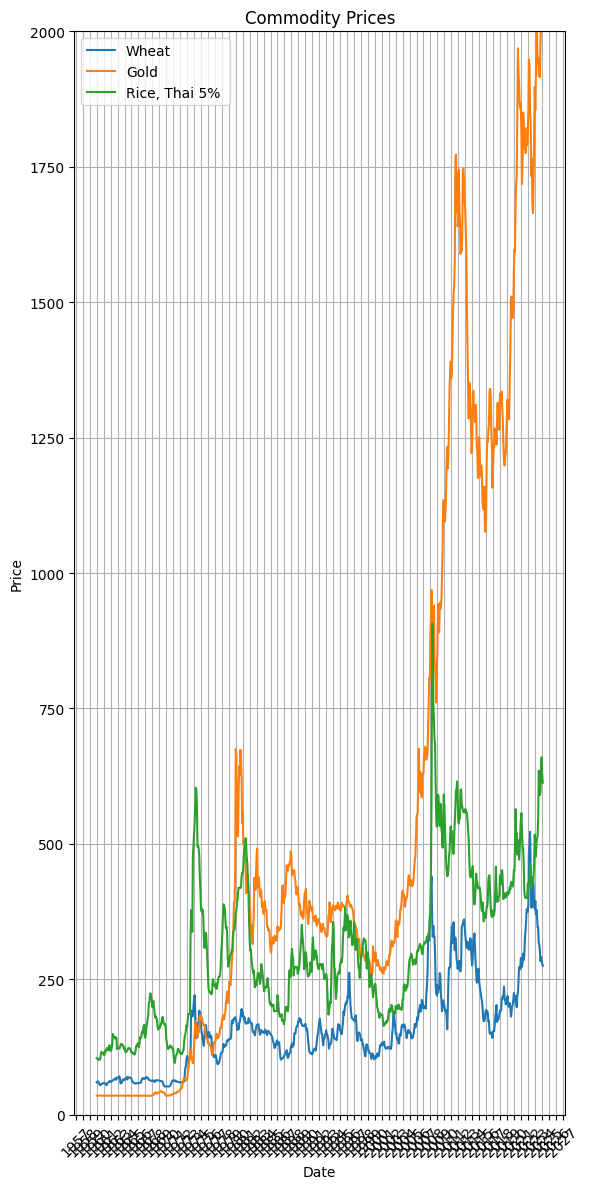

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import YearLocator, DateFormatter
# import numpy as np  # Needed for heatmap
# from datetime import datetime  # Assuming Start Date is datetime format

# # Increase figure size
# plt.figure(figsize=(6, 12))  # Swap width and height for vertical orientation

# # Plot with labels and title (adjust y-axis range to 2000)
# lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
# lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
# lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

# plt.xlabel('Date')
# plt.ylabel('Price')  # Assuming the values represent price
# plt.title('Commodity Prices')
# plt.legend()

# # Set gridlines
# plt.grid(True)

# # Control x-axis ticks for yearly increments
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# # Show the plot with potentially adjusted rotation for labels
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

# plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# # Now set the y-axis limits after creating the lines
# plt.ylim(0, 2000)  # Set y-axis range to (0, 2000)

# # Calculate year ranges for heatmap
# years = war_data["Start Date"].dt.year  # Extract years from Start Date

# # Create a binary array indicating conflict presence (1) or absence (0) for each year
# conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
# for index, row in war_data.iterrows():
#     start_year = row["Start Date"].dt.year.item()  # Extract year from datetime (assuming single value)
#     end_year = row["End Date"].dt.year.item()  # Extract year from datetime (assuming single value)
#     for year in range(start_year, end_year + 1):
#         conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

# # Plot the heatmap (using y-axis for years)
# extent = (min(years), max(years), 0, 1.1)  # Adjust extent for year range and binary values
# cmap = plt.cm.binary  # Choose a colormap for conflict presence (e.g., black for conflict, white for no conflict)
# plt.imshow(conflict_presence.reshape(-1, 1), extent=extent, cmap=cmap, alpha=0.7)

# # Inverted x-axis for heatmap (optional)
# # plt.gca().invert_xaxis()  # Invert x-axis to align with price x-axis (optional)

# plt.colorbar(label="Conflict Presence (1 = Conflict)")  # Add colorbar with label

# plt.show()

In [ ]:
war_data = pd.read_csv("Resources\warlist.csv")
war_data = war_data.rename(columns={"Years": "Start Year"})
# Extract end year and update "Years" column (efficient)
war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# Optional: Remove leading "- " (if present)
war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   War         148 non-null    object        
 1   Start Year  148 non-null    object        
 2   End Year    148 non-null    object        
 3   Start Date  148 non-null    datetime64[ns]
 4   End Date    148 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 5.9+ KB


NameError: name 'date2num' is not defined

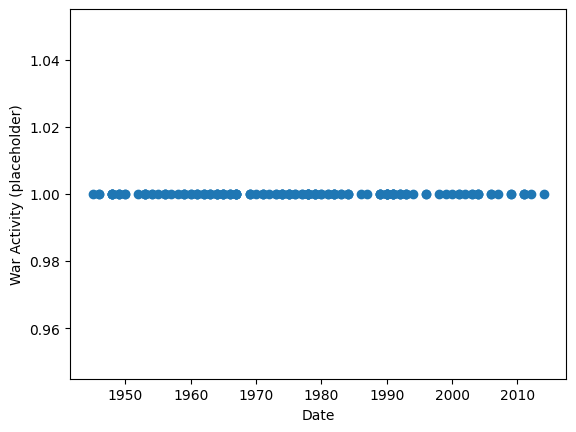

In [ ]:
war_data.info()
war_data



# Create the plot
fig, ax = plt.subplots()

# Loop through each war and plot data points (optional)
for index, row in war_data.iterrows():
     plt.plot([row["Start Date"], row["End Date"]], [1, 1], label=row["War"])

# Alternatively, use scatter plot for many data points
plt.scatter(war_data["Start Date"], [1 for _ in range(len(war_data))], label="Wars")  # Adjust y-values if needed

# Set labels and title
plt.xlabel("Date")
plt.ylabel("War Activity (placeholder)")  # Adjust label based on your data

# Function to improve date axis formatting (optional)
def format_date_axis(ax):
  plt.setp(ax.xaxis.dateticklabels, rotation=45)  # Rotate x-axis labels
  fig.autofmt_xdate()  # Improve date label formatting

# Plot area spans for war durations
for index, row in war_data.iterrows():
  start_date_num = date2num(row["Start Date"])
  end_date_num = date2num(row["End Date"])
  ax.axvspan(start_date_num, end_date_num, alpha=0.3, label=row["War"])

# Add legend
#plt.legend(title="Wars")

# Date axis formatting (call the function if desired)
format_date_axis(ax)

# Display the plot
plt.show()
